In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('Telecustomers.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [4]:
df.shape

(1000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [6]:
df.custcat.value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [7]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [8]:
X

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3
996,1,7,34,0,2,22.0,5,5,0.0,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1
998,3,70,49,0,18,87.0,2,22,0.0,1,1


In [9]:
Y

0      1
1      4
2      3
3      1
4      3
      ..
995    1
996    1
997    4
998    3
999    2
Name: custcat, Length: 1000, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler
x = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [11]:
x

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [13]:
x=pd.DataFrame(x,columns=X.columns)

In [14]:
x

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,-0.026968,-1.055125,0.184505,1.010051,-0.253034,-0.126506,1.087753,-0.594123,-0.222076,-1.034598,-0.230650
1,1.198836,-1.148806,-0.691812,1.010051,-0.451415,0.546450,1.906227,-0.594123,-0.222076,-1.034598,2.556662
2,1.198836,1.521092,0.821826,1.010051,1.234819,0.359517,-1.367671,1.787528,-0.222076,0.966559,-0.230650
3,-0.026968,-0.118319,-0.691812,-0.990050,0.044536,-0.416251,-0.549196,-1.090300,-0.222076,0.966559,-0.927478
4,-0.026968,-0.586722,-0.930808,1.010051,-0.253034,-0.444291,-1.367671,-0.891829,-0.222076,-1.034598,1.163006
...,...,...,...,...,...,...,...,...,...,...,...
995,1.198836,-1.195646,-0.213821,-0.990050,-1.145747,-0.472331,0.269278,-1.090300,-0.222076,0.966559,0.466178
996,-1.252771,-1.336167,-0.612147,-0.990050,-0.947366,-0.519064,1.906227,-0.594123,-0.222076,0.966559,-0.927478
997,1.198836,1.474252,1.379482,-0.990050,2.821863,8.098513,1.906227,2.184470,-0.222076,0.966559,-0.927478
998,1.198836,1.614773,0.582830,-0.990050,0.639678,0.088466,-0.549196,1.092880,-0.222076,0.966559,-0.927478


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
K=4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = K).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy of model at K=4 is",accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.32


In [23]:
print(Pred_y)

[1 1 3 2 4 3 3 2 2 4 1 4 2 1 3 1 3 4 3 4 3 3 3 1 1 3 1 1 1 2 1 1 4 4 3 2 3
 1 2 3 1 4 2 1 2 1 4 1 4 4 2 1 2 3 2 3 3 3 4 1 1 4 2 3 3 1 1 2 2 1 1 3 4 3
 2 1 4 2 2 3 3 1 2 4 4 2 3 4 1 1 2 2 1 1 1 1 2 2 3 1 1 4 1 1 1 4 2 2 2 2 1
 3 2 4 1 2 1 1 2 3 4 2 2 3 1 1 2 3 1 3 3 1 1 4 2 2 2 1 1 3 1 1 4 1 1 2 1 3
 2 2 1 2 2 3 2 3 3 3 3 2 3 1 1 1 3 4 1 1 3 1 3 3 1 2 2 2 1 1 1 1 1 1 1 2 3
 1 1 1 4 4 3 1 1 3 3 4 1 4 3 3]


In [25]:
K=40
error_rate=[]
#will take some time
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Minimum error:- 0.59 at K = 37


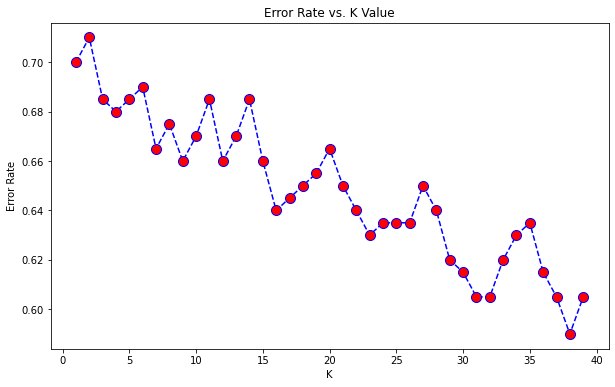

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [27]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

Maximum accuracy:- 0.41 at K = 37


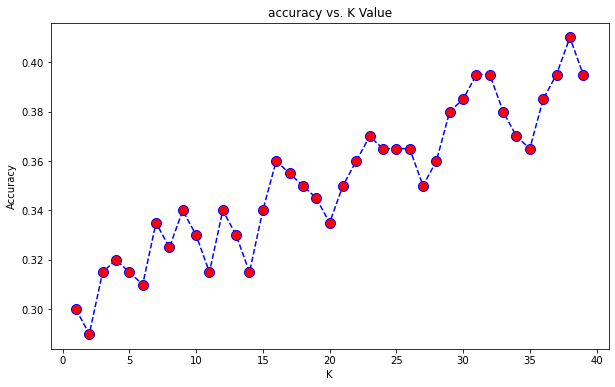

In [28]:

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [29]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [31]:
X

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3
996,1,7,34,0,2,22.0,5,5,0.0,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1
998,3,70,49,0,18,87.0,2,22,0.0,1,1


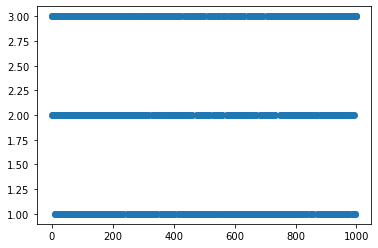

In [42]:
plt.scatter(range(0,1000),X["region"])

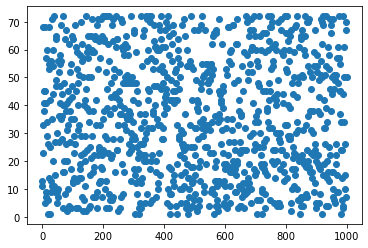

In [43]:
plt.scatter(range(0,1000),X["tenure"])

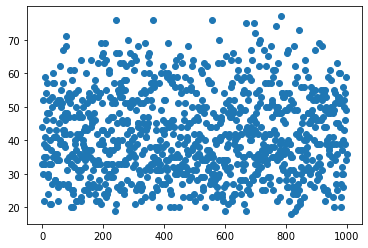

In [44]:
plt.scatter(range(0,1000),X["age"])

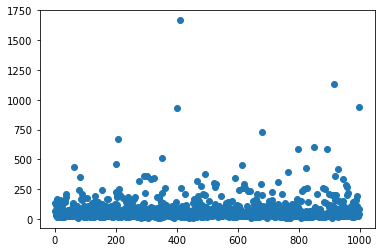

In [45]:
plt.scatter(range(0,1000),X["income"])

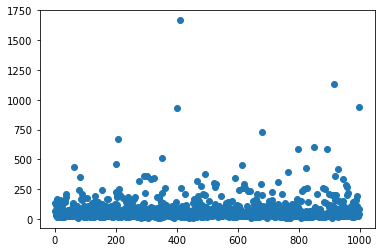

In [46]:
plt.scatter(range(0,1000),X["income"])

<AxesSubplot:xlabel='income'>

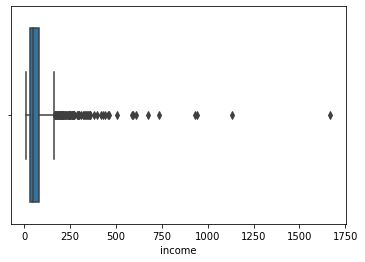

In [49]:
import seaborn as sns
sns.boxplot(data=X,x="income")

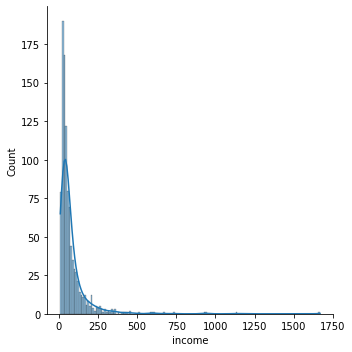

In [54]:
sns.displot(data=X, x="income", kde=True)

In [55]:
nhh=KNeighborsClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix()

X_train, X_test, y_train, y_test

In [56]:
X_train

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
608,-1.252771,-1.523528,-0.851143,1.010051,-0.748986,-0.509718,1.087753,-0.693358,-0.222076,-1.034598,1.859834
511,-0.026968,0.256404,0.343835,1.010051,0.242917,-0.285399,-0.549196,0.001290,-0.222076,-1.034598,1.859834
641,-1.252771,-0.774083,-0.691812,1.010051,-0.054654,-0.519064,-1.367671,-0.792593,-0.222076,-1.034598,1.859834
112,-0.026968,-1.523528,-0.373152,-0.990050,0.143727,-0.500371,-1.367671,-0.792593,-0.222076,0.966559,-0.927478
535,1.198836,-0.211999,-0.612147,-0.990050,-0.253034,0.256705,1.087753,-0.395652,-0.222076,0.966559,1.163006
...,...,...,...,...,...,...,...,...,...,...,...
897,-1.252771,-0.446201,0.423500,-0.990050,0.143727,-0.219973,0.269278,-1.090300,-0.222076,-1.034598,-0.927478
709,-0.026968,0.865328,0.025174,1.010051,-1.145747,-0.210626,1.087753,-0.891829,-0.222076,-1.034598,1.859834
439,1.198836,-1.476688,-0.851143,-0.990050,-0.649795,-0.360172,-0.549196,-0.594123,-0.222076,-1.034598,-0.230650
174,1.198836,1.380572,1.299817,-0.990050,0.143727,0.836195,-0.549196,0.298996,-0.222076,0.966559,-0.230650


In [57]:
X_test

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
698,-1.252771,-0.961444,-0.930808,1.010051,-0.352225,0.116506,-0.549196,0.001290,-0.222076,-1.034598,1.859834
577,-1.252771,-1.476688,-0.134156,-0.990050,0.044536,-0.369518,-0.549196,-0.594123,-0.222076,-1.034598,-0.927478
763,-1.252771,-0.539882,1.538813,1.010051,-0.550605,0.322131,1.087753,-0.792593,-0.222076,0.966559,1.163006
790,-1.252771,-0.774083,-0.851143,1.010051,-1.145747,-0.519064,1.087753,-0.891829,-0.222076,-1.034598,0.466178
520,-1.252771,0.490605,-1.010473,1.010051,-0.748986,0.116506,1.906227,-0.792593,-0.222076,-1.034598,1.163006
...,...,...,...,...,...,...,...,...,...,...,...
127,-0.026968,-0.305680,-0.851143,1.010051,-1.046556,-0.163893,1.087753,-0.494887,-0.222076,-1.034598,1.859834
924,-0.026968,-0.165159,0.184505,-0.990050,-0.153844,1.153980,-0.549196,1.291351,-0.222076,-1.034598,-0.927478
632,-0.026968,-0.539882,-0.134156,1.010051,-0.748986,-0.360172,0.269278,-0.594123,-0.222076,0.966559,-0.230650
869,1.198836,1.614773,-0.452817,-0.990050,-0.352225,-0.257359,-1.367671,0.398232,-0.222076,0.966559,-0.927478


In [58]:
from sklearn.tree import DecisionTreeClassifier


In [59]:
dc=DecisionTreeClassifier()

In [60]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
dc.score(dc.predict(X_test),y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[3. 3. 4. 4. 2. 4. 3. 1. 2. 2. 4. 2. 3. 1. 1. 3. 4. 2. 3. 2. 3. 2. 3. 1.
 1. 2. 1. 4. 1. 3. 1. 2. 1. 2. 1. 2. 3. 1. 4. 4. 3. 4. 3. 3. 2. 3. 4. 1.
 3. 4. 2. 3. 1. 2. 2. 1. 4. 1. 1. 2. 3. 4. 2. 1. 3. 4. 1. 1. 3. 3. 2. 1.
 4. 4. 1. 2. 1. 3. 1. 2. 4. 2. 2. 1. 2. 3. 3. 4. 1. 1. 2. 1. 3. 1. 1. 3.
 2. 1. 1. 4. 1. 1. 1. 3. 1. 3. 3. 4. 2. 1. 1. 1. 2. 2. 1. 2. 1. 2. 2. 1.
 1. 1. 2. 4. 3. 4. 4. 3. 1. 1. 1. 1. 1. 1. 3. 1. 3. 4. 1. 2. 1. 4. 3. 1.
 2. 1. 4. 1. 1. 3. 1. 2. 3. 3. 2. 3. 1. 1. 3. 2. 2. 1. 2. 1. 3. 2. 1. 1.
 3. 4. 4. 4. 3. 3. 3. 2. 4. 4. 1. 1. 3. 2. 2. 3. 1. 1. 3. 1. 4. 2. 3. 2.
 2. 2. 4. 2. 1. 4. 2. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [66]:
accuracy_score(dc.predict(X_test),y_test)

0.335

In [68]:
df.corr()["custcat"]

region    -0.023771
tenure     0.166691
age        0.056909
marital    0.083836
address    0.067913
income     0.134525
ed         0.193864
employ     0.110011
retire     0.008908
gender    -0.004966
reside     0.082022
custcat    1.000000
Name: custcat, dtype: float64

# not related to KNN   just for LEarninG

In [76]:
df["custcat"].value_counts(normalize=True)

3    0.281
1    0.266
4    0.236
2    0.217
Name: custcat, dtype: float64

In [72]:
X_train, X_test, y_train, y_test = train_test_split( x, Y, test_size=0.2, random_state=4,stratify=Y)


In [74]:
y_train.value_counts(normalize=True)

3    0.28125
1    0.26625
4    0.23625
2    0.21625
Name: custcat, dtype: float64

In [75]:
y_test.value_counts(normalize=True)

3    0.280
1    0.265
4    0.235
2    0.220
Name: custcat, dtype: float64